In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx


In [53]:
def qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos):
    num_qubits = len(qubit_list)
    qubits_per_node = num_qubits//num_nodes
    delta = 0.1
    for i_n in range(num_nodes):
        plt.fill_between([gate_pos-step,gate_final_pos],[(i_n-delta)*qubits_per_node,(i_n-delta)*qubits_per_node],[(i_n+1+delta)*qubits_per_node-1,(i_n+1+delta)*qubits_per_node-1],color="gainsboro")

    for i_q, qubit in enumerate(qubit_list):
        if i_q % 2 ==0:
            plt.plot([gate_pos-step,gate_final_pos],[i_q,i_q],"k")
        else:
            plt.plot([gate_pos-step,gate_final_pos],[i_q,i_q],color="gray")
        plt.text(-3,i_q, qubit)

def circuit_plot(gate_pos,gate_seq):
    # gate_pos = 0
    # gate_final_pos = gate_pos+ (1+num_gates)*step
    for gate in gate_seq:
        g0 = int(gate[0].split(",")[-1])+ int(gate[0].split(",")[0])* qubits_per_node
        g1 = int(gate[1].split(",")[-1])+ int(gate[1].split(",")[0])* qubits_per_node
        plt.plot([gate_pos,gate_pos],[g0,g1],"ko-",markersize=3.5)
        gate_pos += step

    # plt.axis("off")
    # plt.show()
        

[('4,0', '4,1'), ('3,0', '4,0'), ('2,0', '3,0'), ('2,2', '4,0'), ('3,2', '4,1'), ('2,1', '3,2'), ('0,2', '1,2'), ('2,0', '4,0'), ('2,0', '5,1'), ('1,0', '1,2'), ('0,0', '0,1'), ('3,2', '4,0'), ('2,2', '3,1'), ('3,0', '3,2'), ('1,0', '2,1'), ('2,0', '3,1'), ('3,0', '5,2'), ('1,0', '5,1'), ('2,2', '4,2'), ('0,2', '3,0')]


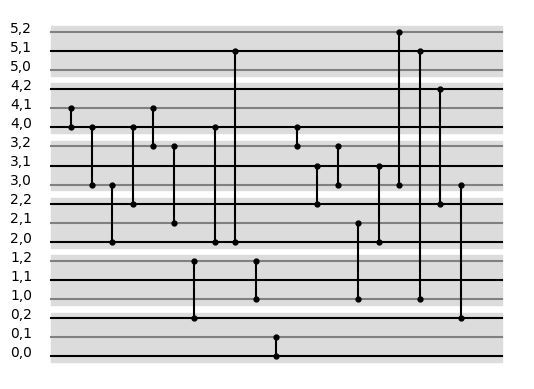

In [54]:
node_list = range(6)
qubits_per_node = 3
num_nodes = len(node_list)
num_qubits = num_nodes * qubits_per_node
num_gates = 20

# Q = nx.Graph()
# Q.add_nodes_from(node_list)

qubit_list = []
for node in node_list:
    for qubit in range(qubits_per_node):
        qubit_list.append((f"{node},{qubit}"))

connections = []
for i in range(num_qubits):
    for j in range(i+1,num_qubits):
        connections.append((qubit_list[i],qubit_list[j]))

# print(qubit_list)
gate_seq = random.choices(connections, k=num_gates)
print(gate_seq)

gate_pos = 0
step = 1
gate_final_pos = gate_pos+ (1+num_gates)*step
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
circuit_plot(gate_pos,gate_seq)
plt.axis("off")
plt.show()

In [76]:
num_nodes = 4
node_list = range(num_nodes)
qubits_per_node = 2
qubit_list = range(qubits_per_node)
num_qubits = num_nodes * qubits_per_node
num_gates = 20

connections = []
for i in range(num_nodes):
    for j in range(i+1,num_nodes):
        connections.append((node_list[i],node_list[j]))

gate_seq_nodes = random.choices(connections, k=num_gates)
print(gate_seq_nodes)
gate_seq = []
for n1, n2 in gate_seq_nodes:
    gate_seq.append((f"{n1},{random.sample(qubit_list,1)[0]}",f"{n2},{random.sample(qubit_list,1)[0]}"))

print(gate_seq)

[(2, 3), (1, 3), (1, 3), (2, 3), (1, 2), (1, 3), (0, 2), (1, 3), (2, 3), (1, 3), (0, 3), (0, 2), (0, 2), (2, 3), (1, 3), (0, 3), (0, 2), (1, 2), (0, 1), (2, 3)]
[('2,1', '3,0'), ('1,1', '3,0'), ('1,0', '3,0'), ('2,0', '3,1'), ('1,0', '2,1'), ('1,0', '3,1'), ('0,0', '2,0'), ('1,1', '3,0'), ('2,0', '3,0'), ('1,1', '3,0'), ('0,0', '3,0'), ('0,0', '2,0'), ('0,1', '2,1'), ('2,0', '3,0'), ('1,0', '3,1'), ('0,1', '3,0'), ('0,0', '2,0'), ('1,1', '2,0'), ('0,0', '1,1'), ('2,0', '3,0')]


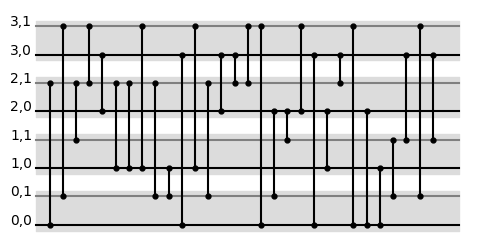

[[('0,0', '2,1'), ('0,1', '3,1'), ('2,0', '3,0')], [('1,1', '2,1'), ('0,0', '3,0')], [('2,1', '3,1'), ('2,0', '3,0')], [('1,0', '2,1')], [('1,0', '3,1'), ('0,1', '2,1')], [('0,1', '1,0')], [('1,0', '3,1'), ('0,1', '2,1')], [('2,1', '3,0'), ('0,1', '2,0')], [('2,1', '3,1'), ('1,1', '2,0')], [('0,0', '3,1'), ('0,1', '1,1')], [('2,0', '3,1'), ('0,0', '3,0')], [('1,0', '2,0'), ('2,1', '3,0'), ('0,0', '3,1')], [('0,0', '2,0'), ('1,1', '3,0'), ('0,1', '3,1')], [('0,0', '1,0')]]


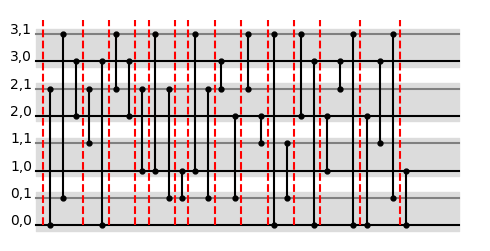

{('0,0', '0,1'): 0, ('0,0', '1,0'): 1, ('0,0', '1,1'): 0, ('0,0', '2,0'): 1, ('0,0', '2,1'): 1, ('0,0', '3,0'): 2, ('0,0', '3,1'): 2, ('0,1', '1,0'): 1, ('0,1', '1,1'): 1, ('0,1', '2,0'): 1, ('0,1', '2,1'): 2, ('0,1', '3,0'): 0, ('0,1', '3,1'): 2, ('1,0', '1,1'): 0, ('1,0', '2,0'): 1, ('1,0', '2,1'): 2, ('1,0', '3,0'): 0, ('1,0', '3,1'): 2, ('1,1', '2,0'): 1, ('1,1', '2,1'): 1, ('1,1', '3,0'): 2, ('1,1', '3,1'): 0, ('2,0', '2,1'): 0, ('2,0', '3,0'): 2, ('2,0', '3,1'): 1, ('2,1', '3,0'): 2, ('2,1', '3,1'): 2, ('3,0', '3,1'): 0}
{('0,0', '0,1'): 0, ('0,0', '1,0'): 1, ('0,0', '1,1'): 0, ('0,0', '2,0'): 1, ('0,0', '2,1'): 1, ('0,0', '3,0'): 2, ('0,0', '3,1'): 2, ('0,1', '1,0'): 1, ('0,1', '1,1'): 1, ('0,1', '2,0'): 1, ('0,1', '2,1'): 2, ('0,1', '3,0'): 0, ('0,1', '3,1'): 2, ('1,0', '1,1'): 0, ('1,0', '2,0'): 1, ('1,0', '2,1'): 2, ('1,0', '3,0'): 0, ('1,0', '3,1'): 2, ('1,1', '2,0'): 1, ('1,1', '2,1'): 1, ('1,1', '3,0'): 2, ('1,1', '3,1'): 0, ('2,0', '2,1'): 0, ('2,0', '3,0'): 2, ('2,0', '3

In [135]:
num_nodes = 4
node_list = range(num_nodes)
qubits_per_node = 2
qubit_list = range(qubits_per_node)
num_qubits = num_nodes * qubits_per_node
num_gates = 30

node_qubit_list = []
for node in node_list:
    for qubit in range(qubits_per_node):
        node_qubit_list.append((f"{node},{qubit}"))


connections = []
for i in range(num_nodes):
    for j in range(i+1,num_nodes):
        connections.append((node_list[i],node_list[j]))

gate_seq_nodes = random.choices(connections, k=num_gates)
# print(gate_seq_nodes)
gate_seq = []
for n1, n2 in gate_seq_nodes:
    gate_seq.append((f"{n1},{random.sample(qubit_list,1)[0]}",f"{n2},{random.sample(qubit_list,1)[0]}"))

# print(gate_seq)

gate_pos = 0
step = 1
plt.figure(figsize=(6,3))
gate_final_pos = gate_pos+ (1+num_gates)*step
qpu_plot(node_qubit_list,num_nodes,gate_pos,gate_final_pos)
circuit_plot(gate_pos,gate_seq)
plt.axis("off")
plt.show()

gate_seq_iter = gate_seq.copy()

Q = nx.Graph()
Q.add_nodes_from(node_qubit_list)

query_seq = []
query = []
gate_mul = {}
gate_mul_seq = []
while len(gate_seq_iter)>0:
    # print(gate_seq_iter)
    inds_keep = []
    not_block_gate = True
    for i_g, gate_nodes in enumerate(gate_seq_iter):
        if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
            if gate_nodes in query and not_block_gate:
                gate_mul[gate_nodes] += 1
                # query.append(gate_nodes)
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                inds_keep.append(i_g)
                not_block_gate = False
        else:
            Q.add_edge(gate_nodes[0],gate_nodes[1])
            query.append(gate_nodes)
            gate_mul[gate_nodes] =  1
            not_block_gate = True

    query_seq.append(query)
    gate_mul_seq.append(gate_mul)
    query = []
    gate_mul = {}
    Q = nx.Graph()
    Q.add_nodes_from(node_qubit_list)
    gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

print(query_seq)
# # print(gate_mul_seq)
# # # Q.add_edges_from(gate_seq)

gate_pos = 0
gate_final_pos = gate_pos+ (1+num_gates)*step
plt.figure(figsize=(6,3))
qpu_plot(node_qubit_list,num_nodes,gate_pos,gate_final_pos)

for query in query_seq:
    circuit_plot(gate_pos,query)
    plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    gate_pos += step*len(query)

plt.axis("off")
plt.show()

qubit_connections = []
for i in range(num_qubits):
    for j in range(i+1,num_qubits):
        qubit_connections.append((node_qubit_list[i],node_qubit_list[j]))

gate_mul_orig = {}
gate_mul_query = {}
for link in qubit_connections:
    gate_mul_orig[link] = 0
    gate_mul_query[link] = 0
    
for gate in gate_seq:
    gate_mul_orig[gate] += 1

for i_q, query in enumerate(query_seq):
    for gate in query:
        gate_mul_query[gate] += gate_mul_seq[i_q][gate]

print(gate_mul_orig)
print(gate_mul_query)


Include internal gates and remove them

[('0,0', '2,1'), ('0,1', '1,1'), ('0,1', '2,0'), ('2,0', '2,1'), ('1,0', '1,1'), ('0,1', '1,1'), ('0,0', '1,1'), ('1,0', '3,1'), ('2,0', '2,1'), ('1,0', '1,1'), ('0,1', '1,0'), ('3,0', '3,1'), ('0,1', '3,0'), ('0,1', '2,1'), ('2,0', '3,0'), ('1,0', '3,0'), ('2,1', '3,1'), ('2,1', '3,0'), ('0,1', '1,0'), ('2,0', '2,1')]


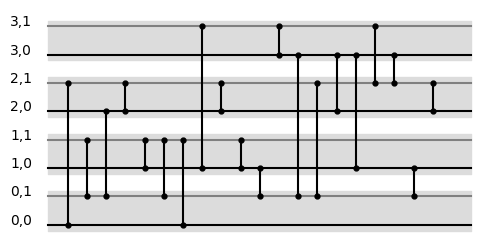

[[('0,0', '2,1'), ('0,1', '1,1')], [('0,1', '2,0'), ('1,0', '1,1')], [('2,0', '2,1'), ('0,1', '1,1'), ('1,0', '3,1')], [('0,0', '1,1'), ('3,0', '3,1')], [('1,0', '1,1')], [('0,1', '1,0')], [('0,1', '3,0')], [('0,1', '2,1'), ('2,0', '3,0')], [('1,0', '3,0'), ('2,1', '3,1')], [('2,1', '3,0'), ('0,1', '1,0')], [('2,0', '2,1')]]
[{('0,0', '2,1'): 1, ('0,1', '1,1'): 1}, {('0,1', '2,0'): 1, ('1,0', '1,1'): 1}, {('2,0', '2,1'): 2, ('0,1', '1,1'): 1, ('1,0', '3,1'): 1}, {('0,0', '1,1'): 1, ('3,0', '3,1'): 1}, {('1,0', '1,1'): 1}, {('0,1', '1,0'): 1}, {('0,1', '3,0'): 1}, {('0,1', '2,1'): 1, ('2,0', '3,0'): 1}, {('1,0', '3,0'): 1, ('2,1', '3,1'): 1}, {('2,1', '3,0'): 1, ('0,1', '1,0'): 1}, {('2,0', '2,1'): 1}]


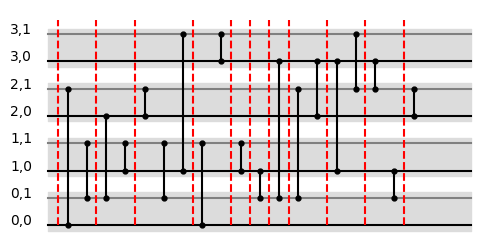

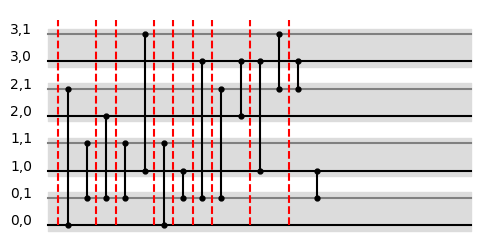

In [86]:
node_list = range(4)
qubits_per_node = 2
num_nodes = len(node_list)
num_qubits = num_nodes * qubits_per_node
num_gates = 20

qubit_list = []
for node in node_list:
    for qubit in range(qubits_per_node):
        qubit_list.append((f"{node},{qubit}"))

connections = []
for i in range(num_qubits):
    for j in range(i+1,num_qubits):
        connections.append((qubit_list[i],qubit_list[j]))

Q = nx.Graph()
Q.add_nodes_from(qubit_list)

gate_seq = random.choices(connections, k=num_gates)
print(gate_seq)

gate_pos = 0
step = 1
plt.figure(figsize=(6,3))
gate_final_pos = gate_pos+ (1+num_gates)*step
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
circuit_plot(gate_pos,gate_seq)
plt.axis("off")
plt.show()

gate_seq_iter = gate_seq.copy()

query_seq = []
query = []
gate_mul = {}
gate_mul_seq = []
while len(gate_seq_iter)>0:
    # print(gate_seq_iter)
    inds_keep = []
    not_block_gate = True
    for i_g, gate_nodes in enumerate(gate_seq_iter):
        if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
            if gate_nodes in query and not_block_gate:
                gate_mul[gate_nodes] += 1
                # query.append(gate_nodes)
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                inds_keep.append(i_g)
                not_block_gate = False
        else:
            Q.add_edge(gate_nodes[0],gate_nodes[1])
            query.append(gate_nodes)
            gate_mul[gate_nodes] =  1
            not_block_gate = True

    query_seq.append(query)
    gate_mul_seq.append(gate_mul)
    query = []
    gate_mul = {}
    Q = nx.Graph()
    Q.add_nodes_from(qubit_list)
    gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

print(query_seq)
print(gate_mul_seq)
# # # Q.add_edges_from(gate_seq)

gate_pos = 0
gate_final_pos = gate_pos+ (1+num_gates)*step
plt.figure(figsize=(6,3))
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)

for query in query_seq:
    circuit_plot(gate_pos,query)
    plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    gate_pos += step*len(query)

plt.axis("off")
plt.show()

gate_mul_orig = {}
gate_mul_query = {}
for link in connections:
    gate_mul_orig[link] = 0
    gate_mul_query[link] = 0
    
for gate in gate_seq:
    gate_mul_orig[gate] += 1

for i_q, query in enumerate(query_seq):
    for gate in query:
        gate_mul_query[gate] += gate_mul_seq[i_q][gate]

# print(gate_mul_orig)
# print(gate_mul_query)

remote_query_seq = []
for query in query_seq:
    remote_query = []
    # print(query)
    for gate in query:
        if gate[0].split(",")[0] != gate[1].split(",")[0]:
            remote_query.append(gate)
    if len(remote_query)>0:
        remote_query_seq.append(remote_query)


gate_pos = 0
gate_final_pos = gate_pos+ (1+num_gates)*step
plt.figure(figsize=(6,3))
qpu_plot(qubit_list,num_nodes,gate_pos,gate_final_pos)
for query in remote_query_seq:
    circuit_plot(gate_pos,query)
    plt.plot([gate_pos-step/2,gate_pos-step/2], [0,num_qubits-0.5], "r--")
    gate_pos += step*len(query)

plt.axis("off")
plt.show()


In [89]:
def parallel_circuit_gen(node_list, qubits_per_node, num_gates):
    num_nodes = len(node_list)
    # node_list = range(num_nodes)
    # qubits_per_node = 3
    qubit_list = range(qubits_per_node)
    # num_qubits = num_nodes * qubits_per_node
    # num_gates = 30

    node_qubit_list = []
    for node in node_list:
        for qubit in range(qubits_per_node):
            node_qubit_list.append((f"{node},{qubit}"))

    connections = []
    for i in range(num_nodes):
        for j in range(i+1,num_nodes):
            connections.append((node_list[i],node_list[j]))

    gate_seq_nodes = random.choices(connections, k=num_gates)
    # print(gate_seq_nodes)
    gate_seq = []
    for n1, n2 in gate_seq_nodes:
        gate_seq.append((f"{n1},{random.sample(qubit_list,1)[0]}",f"{n2},{random.sample(qubit_list,1)[0]}"))

    gate_seq_iter = gate_seq.copy()

    Q = nx.Graph()
    Q.add_nodes_from(node_qubit_list)

    query_seq = []
    query = []
    gate_mul = {}
    gate_mul_seq = []
    while len(gate_seq_iter)>0:
        # print(gate_seq_iter)
        inds_keep = []
        not_block_gate = True
        for i_g, gate_nodes in enumerate(gate_seq_iter):
            if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
                if gate_nodes in query and not_block_gate:
                    gate_mul[gate_nodes] += 1
                    # query.append(gate_nodes)
                else:
                    Q.add_edge(gate_nodes[0],gate_nodes[1])
                    inds_keep.append(i_g)
                    not_block_gate = False
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                query.append(gate_nodes)
                gate_mul[gate_nodes] =  1
                not_block_gate = True

        query_seq.append(query)
        gate_mul_seq.append(gate_mul)
        query = []
        gate_mul = {}
        Q = nx.Graph()
        Q.add_nodes_from(node_qubit_list)
        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]


    return query_seq, gate_mul_seq

# Clos

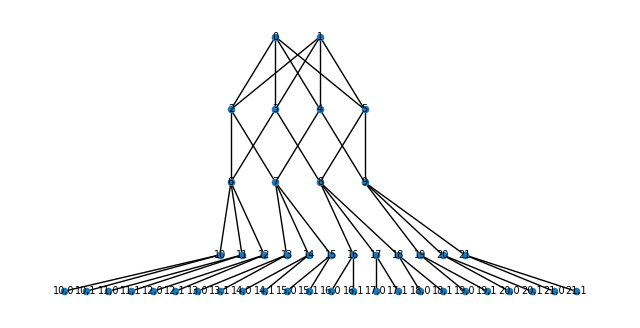

In [132]:
n = 4 # starts from 4
bandwidth = 2
num_bsm = 1
num_ToR = 3
num_qubits_per_node = 2
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
num_nodes = num_edge * num_ToR # number of q nodes
# num_bsms = num_leaves # number of BSMs

if n==4:
    conn_right = [7]
    conn_left = [8]
elif n==6:
    conn_right = [11,14]
    conn_left = [12,15]
elif n==8:
    conn_right = [15,19,23]
    conn_left = [16,20,24]

num_vertices = num_core + num_agg + num_edge + num_nodes
core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')
node_qubit_list = []
for node in node_list:
    for qubit in range(num_qubits_per_node):
        qname = f"{node},{qubit}"
        node_qubit_list.append(qname)
        G.add_edge(node,qname, weight=1)
        
# G.add_nodes_from(node_qubit_list, type='qubit')


for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg, weight=core_bw)

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1], weight=agg_bw)
    agg_conn[i1] -= 1 
    if edge in conn_left:
        extra_edges.append((edge,agg_switches[i1]))
        new_edges.append((edge,agg_switches[i1-1]))
    G.add_edge(edge,agg_switches[i1+1], weight=agg_bw)
    agg_conn[i1+1] -= 1 
    if edge in conn_right:
        extra_edges.append((edge,agg_switches[i1+1]))
        new_edges.append((edge,agg_switches[i1+2]))

G.remove_edges_from(extra_edges)
G.add_edges_from(new_edges, weight=agg_bw)

for i, edge in enumerate(edge_switches):
    for j in range(num_ToR):
        G.add_edge(edge,node_list[num_ToR*i+j], weight=edge_bw)

shift = 3.5
pos_core = {i: (shift+i+ n/4 ,2) for i in core_switches}
pos_agg = {i: (shift+(i-n//2)% n,1) for i in agg_switches}
pos_edge = {i: (shift+i-7*n/4+1,0) for i in edge_switches}
pos_nodes = {node: (shift+i/2-1/4,-1) for i, node in enumerate(node_list)}
pos_qs = {q: (i/2-1/4,-1.5) for i, q in enumerate(node_qubit_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes | pos_qs


fig, ax = plt.subplots(figsize=(8,4))

nx.draw(G, pos, node_size=20, font_size=7, with_labels=True)
plt.show()

# fat tree

In [8]:
n = 4 # starts from 4
bandwidth = 4
num_bsm = 1
num_core = n**2 // 4
num_agg = n * (n // 2)
num_edge = n * (n // 2)
num_nodes = num_edge * (n // 2) # number of q nodes

core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth
num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')


for i_c, core in enumerate(core_switches):
    for i_a, agg in enumerate(agg_switches):
        if i_c % 2 ==0 and i_a % 2 ==0:
            G.add_edge(core,agg, weight=core_bw)
        if i_c % 2 ==1 and i_a % 2 ==1:
            G.add_edge(core,agg, weight=core_bw)

for i_a, agg in enumerate(agg_switches):
    G.add_edge(agg,edge_switches[i_a], weight=agg_bw)
    if i_a % 2 == 0:
        G.add_edge(agg,edge_switches[i_a+1], weight=agg_bw)
    else:
        G.add_edge(agg,edge_switches[i_a-1], weight=agg_bw)

for i, edge in enumerate(edge_switches):
    for j in range(n//2):
        G.add_edge(edge,node_list[(n//2)*i+j], weight=edge_bw)
    

pos_core = {i: (i-n//2 + n**2/4 ,2) for i in core_switches}
pos_agg = {i: ((i-n),1) for i in agg_switches}
pos_edge = {i: ((i-n-(n**2//2)),0) for i in edge_switches}
pos_nodes = {node: (i/2-1/4,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes


gate seq: [('11,1', '13,0'), ('13,1', '17,1'), ('14,1', '20,0'), ('11,0', '18,1'), ('18,0', '21,1'), ('10,0', '12,1')]
('11,1', '13,0') 1
[1 0 1 1]


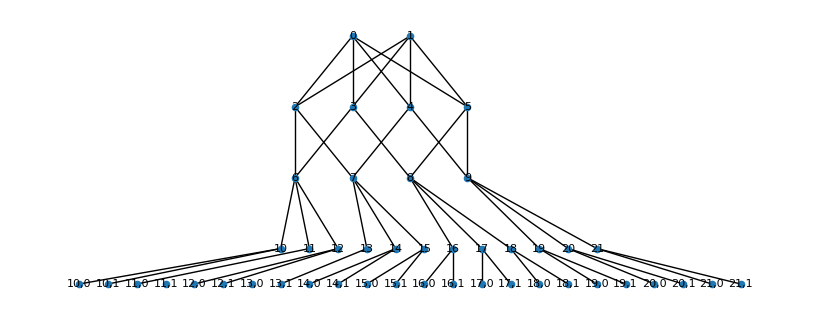

('13,1', '17,1') 1
[1 0 0 1]


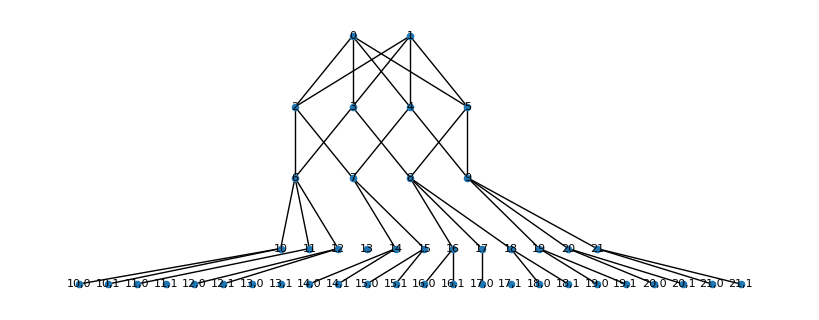

('14,1', '20,0') 1
[1 0 0 0]


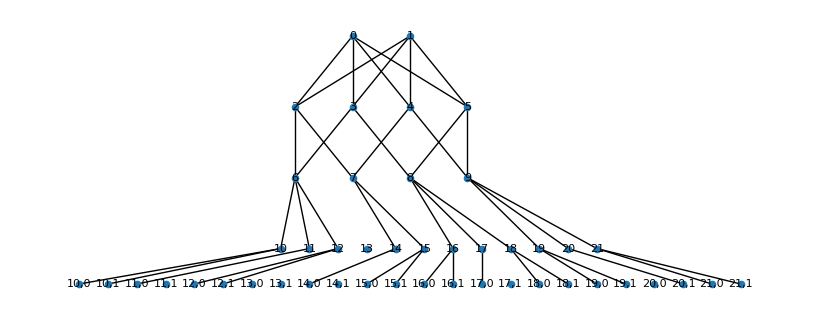

('11,0', '18,1') 1
[0 0 0 0]


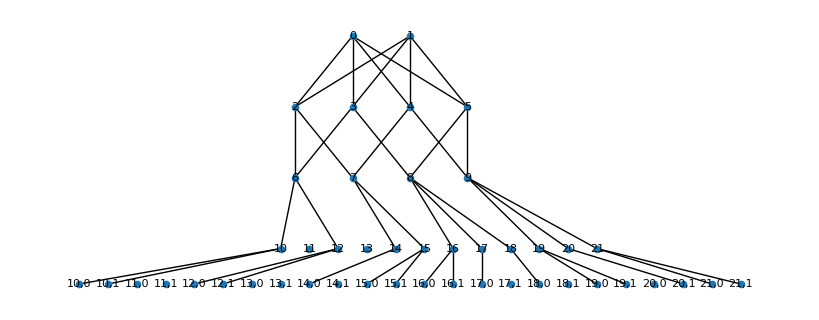

('18,0', '21,1') 1
('10,0', '12,1') 1
('18,0', '21,1') 1
[1 1 0 1]


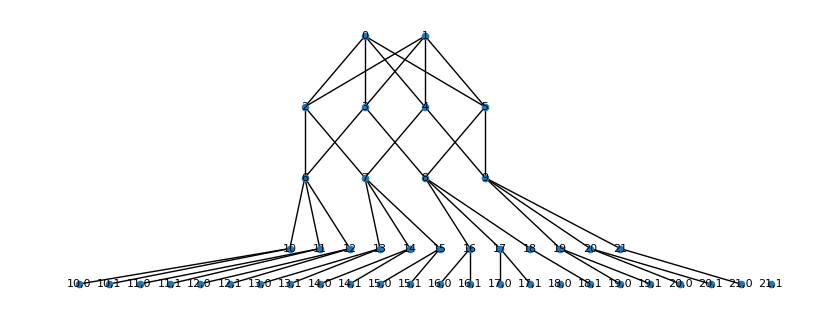

('10,0', '12,1') 1
[0 1 0 1]


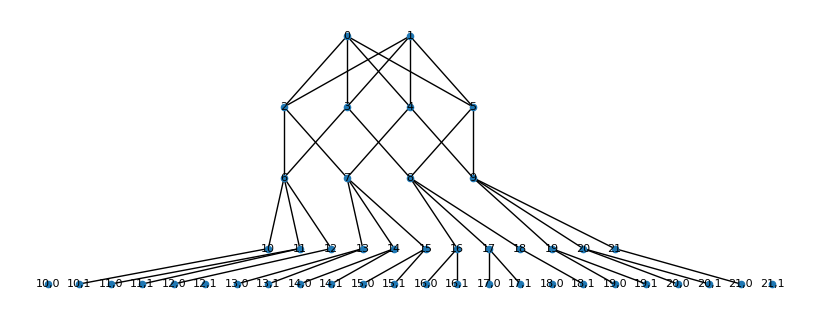

num seq: 6 , num switch: 2 , [4, 2]


In [134]:
def plotter(G_ins,bsm_stat):
    print(bsm_stat)
    plt.figure(figsize=(8,3))
    nx.draw(G_ins, pos, node_size=20, font_size=8, with_labels=True)
    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
    # nx.draw(G,  with_labels=True, node_color = color_list)
    plt.show()

num_gates = 1000

query_seq, gate_mul_seq = parallel_circuit_gen(node_list, num_qubits_per_node, num_gates)

# for i_q, gate_seq in enumerate(query_seq):
for i_q in [0]:
    gate_seq = query_seq[i_q]

    gate_seq_iter = gate_seq[:]
    gate_mul_seq_iter = gate_mul_seq[i_q]
    print("gate seq:", gate_seq)
    # print("num links:", num_links)

    switch_time = []

    while len(gate_seq_iter)>0:
        bsm_stat = np.ones(num_edge,dtype=np.int16)* num_bsm
        G_ins =  G.copy()

        # print(gate_seq_iter)
        inds_keep = []
        for i_g, g in enumerate(gate_seq_iter):
            print(g, gate_mul_seq_iter[g])

            for link in range(gate_mul_seq_iter[g]):
                # n0 = int(g[0].split(",")[0])
                # n1 = int(g[1].split(",")[0])
                n0 = g[0]
                n1 = g[1]
                if nx.has_path(G_ins,n0,n1):
                    shortestpath = nx.shortest_path(G_ins,n0,n1,weight=None)
                    
                    sp = []
                    for i in range(0,len(shortestpath)-1):
                        sp.append((shortestpath[i],shortestpath[i+1]))
                    
                    b = []
                    for i, edge in enumerate(edge_switches):
                        if edge in shortestpath:
                            b.append(i)

                    
                    if len(b)>1:
                        if bsm_stat[b[0]] > 0 and bsm_stat[b[1]] > 0:
                            bsm_stat[random.sample(b,1)] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)

                        elif bsm_stat[b[0]] > 0:
                            bsm_stat[b[0]] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)
        
                        elif bsm_stat[b[1]] > 0:
                            bsm_stat[b[1]] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)

                        else:
                            inds_keep.append(i_g)
                            gate_mul_seq_iter[g] -= link
                            break

                    elif bsm_stat[b] > 0:
                        bsm_stat[b] -= 1
                        for u, v in sp:
                            if G_ins[u][v]['weight'] == 1:
                                G_ins.remove_edge(u, v)
                            else:
                                G_ins[u][v]['weight'] -= 1
                        plotter(G_ins,bsm_stat)        
                    else:
                        inds_keep.append(i_g)
                        gate_mul_seq_iter[g] -= link
                        break
                    #     assert 0
                    # # # print(bsm_stat)
                    # print(bsm_stat)
                    # plt.figure(figsize=(8,3))
                    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
                    # # nx.draw(G,  with_labels=True, node_color = color_list)
                    # plt.show()
                else:
                    inds_keep.append(i_g)
                    gate_mul_seq_iter[g] -= link
                    break

        switch_time.append(np.array(num_bsm-bsm_stat).sum())
        # print(bsm_stat)
        # plt.figure(figsize=(8,3))
        # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
        # # nx.draw(G,  with_labels=True, node_color = color_list)
        # plt.show()

        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]
        gate_mul_seq_iter = {g:gate_mul_seq_iter[g] for g in gate_seq_iter}

    print("num seq:", len(gate_seq), ", num switch:", len(switch_time), ",",switch_time)